# Framework

In [1]:
import numpy as np
import pandas as pd
import pickle
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
from matplotlib.patches import Path, PathPatch

2018/3/2 19:00:00
Hysplit data & Taiwan data done
China data done


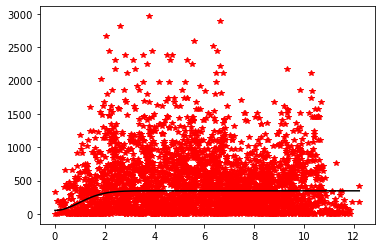

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:140: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


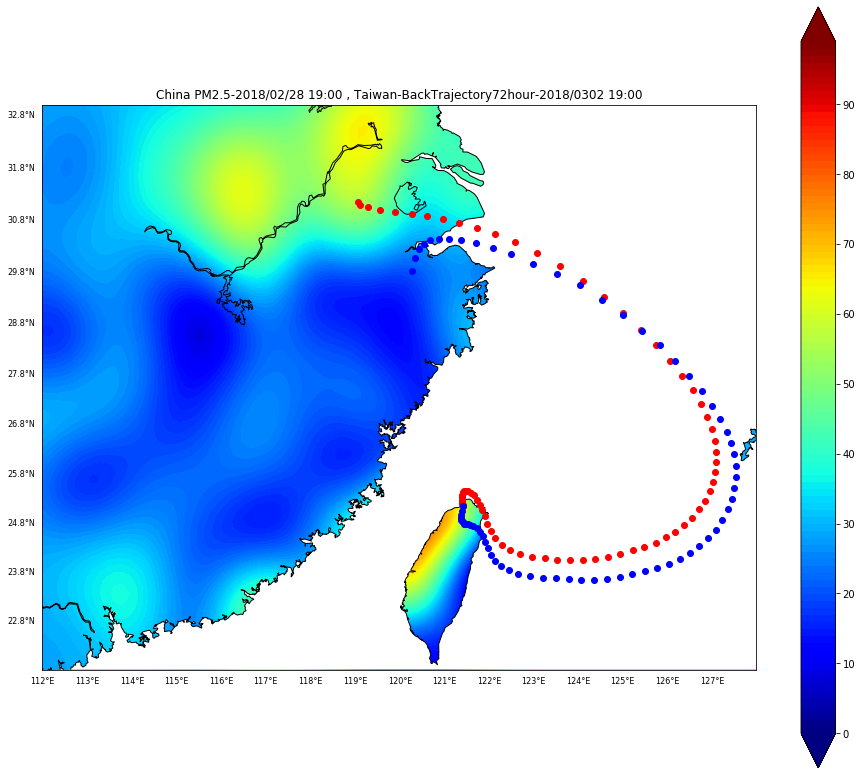

In [4]:
#-------------------------------common setting--------------------------------------------------------------
lon_min = 112
lon_max = 128
lat_min = 21.8
lat_max = 33
contour_level = 100
number_of_grid = 100
nlags = 5000
cbar_max = 100
#-------------------------------common setting--------------------------------------------------------------

#-------------------------------get Hysplit data------------------------------------------------------------
hysplitfile='/ChinaData/Tamsui-20180302-1900-PM25(51).txt'
with open(hysplitfile,'r') as fp:
     hysplit_txt = fp.readlines()
        
hysplit_lat_100list=[]
hysplit_lon_100list=[]
hysplit_lat_500list=[]
hysplit_lon_500list=[]
for hysplit_line in range(len(hysplit_txt)):
    if hysplit_txt[hysplit_line][5:6] == '1': # agl = 100
        if hysplit_txt[hysplit_line][11:12] == '1':
#             print(hysplit_line,'lon=',hysplit_txt[hysplit_line][67:74],'lat=',hysplit_txt[hysplit_line][59:64])
            hysplit_lat_100list.append(np.float(hysplit_txt[hysplit_line][59:64]))
            hysplit_lon_100list.append(np.float(hysplit_txt[hysplit_line][67:74]))
        
    if hysplit_txt[hysplit_line][5:6] == '2': # agl = 500
#         print(hysplit_line,'lon=',hysplit_txt[hysplit_line][67:74],'lat=',hysplit_txt[hysplit_line][59:64])
        hysplit_lat_500list.append(np.float(hysplit_txt[hysplit_line][59:64]))
        hysplit_lon_500list.append(np.float(hysplit_txt[hysplit_line][67:74]))        
#-------------------------------get Hysplit data------------------------------------------------------------

#-------------------------------get Taiwan data-------------------------------------------------------------
datafile='/epa_tw_18.csv'
df_taiwan_all=pd.read_csv(datafile)

Taiwan_year = hysplitfile[54:58]
Taiwan_month = hysplitfile[59:60]
Taiwan_day = hysplitfile[61:62]
Taiwan_hour = hysplitfile[63:65]
# print(Taiwan_year , Taiwan_month , Taiwan_day , Taiwan_hour) 
Taiwan_time_filter = str(Taiwan_year)+'/'+str(Taiwan_month)+'/'+str(Taiwan_day)+' '+str(Taiwan_hour)+':00:00'
print(Taiwan_time_filter)
start = 900000
end = 0
for i in range(df_taiwan_all['read_time'].shape[0]):
    if (df_taiwan_all['read_time'][i] == Taiwan_time_filter):
        if i < start: 
            start = i
        if i > end:
            end = i 
#print(start , end)

df_taiwan = df_taiwan_all[start:end]
lons_taiwan=np.array(df_taiwan['lon']) 
lats_taiwan=np.array(df_taiwan['lat']) 
pm25_taiwan=np.array(df_taiwan['PM2.5'])

data_lons_taiwan = []
data_lats_taiwan = []
for i in range(df_taiwan.shape[0]):
    data_lons_taiwan.append(lons_taiwan[i][1:6])
    data_lats_taiwan.append(lats_taiwan[i][1:5])

data_lons_taiwan = np.array(data_lons_taiwan,dtype='float32')
data_lats_taiwan = np.array(data_lats_taiwan,dtype='float32')
#-------------------------------get Taiwan data-------------------------------------------------------------  
print('Hysplit data & Taiwan data done')

#-------------------------------get china data------------------------------------------------------------- 
with open ('month2', 'rb') as fp:
    df_china = pickle.load(fp)
china_day = 27
china_hour = np.int(hysplitfile[63:65]) # same hour with hysplit & Taiwan
df_china[china_day]['type'] = df_china[china_day]['type'].astype('category')
df_filter_china = df_china[china_day][df_china[china_day]['type'] == 'PM2.5']
df_filter_china.reset_index(drop=True, inplace=True)
df_PM25_china = df_filter_china.drop(['hour', 'type'], axis=1)

coastal_station = df_PM25_china[['南通','无锡','上海','苏州','杭州','台州','温州','宁德','福州','泉州','漳州',
                                 '厦门','揭阳','汕头','南京','常州','扬州','泰州','马鞍山','芜湖','宣城','绍兴',
                                 '宁波','舟山','金华','丽水','南平','三明','龙岩','梅州','河源','汕尾','惠州',
                                 '衢州','上饶','鹰潭','抚州','吉安','赣州','韶关','益阳','衡阳','新余','宜春',
                                 '萍乡','郴州','清远','广州','佛山','黄石','咸宁','岳阳','池州','安庆','九江',
                                 '南昌','景德镇','黄山','鄂州','黄冈','武汉','孝感','随州','信阳','六安','合肥',
                                 '滁州','南京','湖州','荆州']]
# coastal_station
for station in range(70):
    for time in range(24):
        coastal_station.iloc[:,station].values[time]= round(coastal_station.iloc[:,station].fillna(coastal_station.iloc[:,station].mean()),2).values[time] 
        #使用該城市24小時平均值代替該城市NAN值


coastal_station_tansform = coastal_station.T #轉置

coastal_station_tansform['lat']=[31.97,31.49,31.22,31.29,30.27,28.65,27.99,26.66,
                                 26.07,24.87,24.51,24.47,23.54,23.34,32.05,31.81,
                                 32.39,32.45,31.67,31.35,30.93,29.99,29.86,29.98,
                                 29.07,28.46,26.64,26.26,25.07,24.28,23.74,22.78,
                                 23.11,28.96,28.45,28.25,27.94,27.08,25.83,24.80,
                                 28.59,26.96,27.81,27.81,27.62,25.77,23.68,23.13,
                                 23.02,30.20,29.84,29.36,30.65,30.53,29.70,28.68,
                                 29.27,29.71,30.38,30.45,30.59,30.91,31.69,32.14,
                                 31.73,31.81,32.25,32.06,30.89,30.33]
coastal_station_tansform['lon']=[120.89,120.31,121.48,120.57,120.14,121.41,120.69,119.54,
                                 119.29,118.67,117.64,118.09,116.37,116.67,118.81,119.97,
                                 119.40,119.92,118.51,118.42,118.76,120.58,121.55,122.20,
                                 119.64,119.92,118.17,117.64,117.01,116.12,114.70,115.37,
                                 114.40,118.86,117.93,117.06,116.36,114.96,114.93,113.59,
                                 112.40,112.46,114.91,114.41,113.85,113.01,113.05,113.26,
                                 113.12,115.04,114.32,113.13,117.49,117.11,116.00,115.85,
                                 117.18,118.33,114.89,114.87,114.30,113.96,113.38,114.08,
                                 116.52,117.22,118.32,118.79,120.08,112.24]
data_lats_china = np.array(coastal_station_tansform['lat'].values,dtype='float32')
data_lons_china = np.array(coastal_station_tansform['lon'].values,dtype='float32')
pm25_china = coastal_station_tansform[china_hour].values
#     print(data_lons_china.shape, data_lats_china.shape, pm25_china.shape)
#-------------------------------get china data------------------------------------------------------------- 
print('China data done')

data_lats = np.concatenate([data_lats_taiwan,data_lats_china])
data_lons = np.concatenate([data_lons_taiwan,data_lons_china])
pm25 = np.concatenate([pm25_taiwan,pm25_china])
#     print(data_lats.shape , data_lons.shape , pm25.shape)

grid_lon = np.linspace(lon_min, lon_max, number_of_grid)
grid_lat = np.linspace(lat_min, lat_max, number_of_grid)
#---------------------------------------------------------------------------------------------------           
OK = OrdinaryKriging(data_lons, data_lats, pm25, variogram_model='gaussian', 
                     verbose=False, enable_plotting=True,nlags=nlags)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)
#         UK = UniversalKriging(data_lons, data_lats, pm25, variogram_model='gaussian',
#                               drift_terms=['regional_linear'],enable_plotting=True,nlags=nlags,
#                               weight=False)
#         z1, ss1 = UK.execute('grid', grid_lon, grid_lat)        
#---------------------------------------------------------------------------------------------------        
fig, ax = plt.subplots(figsize=(16,14))
m = Basemap(llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max, 
            projection='merc', resolution='i',area_thresh=1000,ax=ax)
m.drawcoastlines()
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)
x,y=m(xintrp, yintrp)
cs=ax.contourf(x, y, z1, contour_level,extend='both',cmap='jet', levels=range(cbar_max))
#         cbar=m.colorbar(cs,location='right',pad="7%",)
plt.colorbar(cs, boundaries=np.arange(0,cbar_max,.5)) 

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
map_edges = np.array([[x0,y0],[x1,y0],[x1,y1],[x0,y1]])

polys = [p.boundary for p in m.landpolygons]
polys = [map_edges]+polys[:]

codes = [[Path.MOVETO]+[Path.LINETO for p in p[1:]]for p in polys]
polys_lin = [v for p in polys for v in p]
codes_lin = [xx for cs in codes for xx in cs]

path = Path(polys_lin, codes_lin)
patch = PathPatch(path,facecolor='white', lw=0)

ax.add_patch(patch)

parallels = np.arange(lat_min,lon_min,1)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=8, linewidth=0.0) #Draw the latitude labels on the map
meridians = np.arange(lon_min,lon_max,1)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=8, linewidth=0.0)

plt.title('China PM2.5-2018/02/'+repr(china_day+1)+' '+repr(china_hour)+':00 , Taiwan-BackTrajectory72hour-2018/'+str(hysplitfile[58:62])+' '+str(Taiwan_hour)+':00')
#         for i in range(data_lons.shape[0]):
#             data_x, data_y = m(data_lons[i], data_lats[i])
#             ax.annotate(pm25[i], xy=(data_x,data_y))        


for point in range(len(hysplit_lat_100list)):
    point_x, point_y = m(hysplit_lon_100list[point], hysplit_lat_100list[point])
    plt.plot(point_x, point_y, 'ro--', linewidth=2, markersize=6)

for point in range(len(hysplit_lat_500list)):
    point_x, point_y = m(hysplit_lon_500list[point], hysplit_lat_500list[point])
    plt.plot(point_x, point_y, 'bo--', linewidth=2, markersize=6)

plt.show()